multivariant analysis 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
!wget --header="Host: query1.finance.yahoo.com" --header="User-Agent: Mozilla/5.0 (X11; CrOS x86_64 13816.82.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.218 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://finance.yahoo.com/quote/GOOG/history/?guccounter=1&guce_referrer=aHR0cHM6Ly9rZ3B0YWxraWUuY29tLw&guce_referrer_sig=AQAAABaacfkXq-o5R0esADff7AmimLx0dSNeT65B0a_Y8e-UOHhaU19pw1H9mdzdZD2hHIRpVgEKzI6JuPP8hj0PzrgpIyXmclIaPXISqMS2Gw3IwBgGEtPZLtZGAgK5axKNZAm5Jmuu5gDloGokkGPrI6Ql4VZsSwFgjtasxk2ZkzeF" --header="Cookie: APID=UPae563c54-a8a1-11eb-918d-067c02a70026; B=9ltjes9g8iabo&b=3&s=qv; GUCS=AUPWjVuw; A1=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok; A3=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok; A1S=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok&j=WORLD; GUC=AQEBBAFgsOxheUIhUgTP; cmp=t=1622122710&j=0; PRF=t%3DGOOG; APIDTS=1622124171" --header="Connection: keep-alive" "https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1590586711&period2=1622122711&interval=1d&events=history&includeAdjustedClose=true" -c -O 'GOOG.csv'

--2021-05-27 15:07:36--  https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1590586711&period2=1622122711&interval=1d&events=history&includeAdjustedClose=true
Resolving query1.finance.yahoo.com (query1.finance.yahoo.com)... 69.147.92.12, 69.147.92.11, 2001:4998:14:800::1000, ...
Connecting to query1.finance.yahoo.com (query1.finance.yahoo.com)|69.147.92.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘GOOG.csv’

GOOG.csv                [ <=>                ]  19.62K  --.-KB/s    in 0.02s   

2021-05-27 15:07:36 (1.10 MB/s) - ‘GOOG.csv’ saved [20094]



In [ ]:
df=pd.read_csv('/content/GOOG.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
1,2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
2,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1820900
3,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
4,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100
...,...,...,...,...,...,...,...
249,2021-05-21,2365.989990,2369.000000,2342.370117,2345.100098,2345.100098,1139600
250,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
251,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
252,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,1789.499601,1811.306100,1771.753335,1792.030291,1792.030291,1.630167e+06
std,307.968124,309.454076,307.565116,308.655695,308.655695,6.010131e+05
min,1358.180054,1395.599976,1347.010010,1359.900024,1359.900024,3.059500e+05
25%,1511.422486,1527.672973,1497.745025,1515.915039,1515.915039,1.248650e+06
50%,1743.845032,1765.065002,1728.399963,1744.369995,1744.369995,1.501900e+06
75%,2066.592529,2088.018554,2040.971283,2060.427429,2060.427429,1.824925e+06
max,2436.939941,2452.377930,2425.159912,2433.530029,2433.530029,4.329100e+06


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head(150)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
1,2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
2,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1820900
3,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
4,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100
...,...,...,...,...,...,...,...
145,2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400
146,2020-12-22,1734.430054,1737.405029,1712.574951,1723.500000,1723.500000,936700
147,2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800
148,2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
len(df)

254

In [ ]:
#splitting of data
data_training = df[df['Date']<'2021-01-31'].copy()
data_test=df[df['Date']>'2021-01-31'].copy()

In [ ]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
1,2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
2,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1820900
3,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
4,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100
...,...,...,...,...,...,...,...
167,2021-01-25,1920.670044,1929.579956,1867.530029,1899.400024,1899.400024,1927300
168,2021-01-26,1888.839966,1925.000000,1884.244995,1917.239990,1917.239990,1313100
169,2021-01-27,1882.530029,1890.000000,1809.000000,1830.790039,1830.790039,2748300
170,2021-01-28,1843.939941,1898.829956,1842.640015,1863.109985,1863.109985,1773100


In [ ]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
172,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
173,2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700
174,2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200
175,2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300
176,2021-02-05,2070.000000,2102.510010,2059.330078,2098.000000,2098.000000,1535100
...,...,...,...,...,...,...,...
249,2021-05-21,2365.989990,2369.000000,2342.370117,2345.100098,2345.100098,1139600
250,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
251,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
252,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092300


In [ ]:
data_training = data_training.drop(['Date'], axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train=scaler.fit_transform(data_training)

In [ ]:
trainX = []
trainY = []

n_future = 1   
n_past = 60 

for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(scaled_train[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (112, 60, 6).
trainY shape == (112, 1).


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 64)            18176     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16)

Epoch 1/100
7/7 [==============================] - 2s 87ms/step - loss: 0.2684
Epoch 2/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0560
Epoch 3/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0347
Epoch 4/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0275
Epoch 5/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0242
Epoch 6/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0221
Epoch 7/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0238
Epoch 8/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0229
Epoch 9/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0202
Epoch 10/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0148
Epoch 11/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0188
Epoch 12/100
7/7 [==============================] - 1s 91ms/step - loss: 0.0180
Epoch 13/100
7/7 [==============================]

In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
172,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
173,2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700
174,2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200
175,2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300
176,2021-02-05,2070.000000,2102.510010,2059.330078,2098.000000,2098.000000,1535100


In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
df1 = past_60_days.append(data_test, ignore_index = True)
df1 = df1.drop(['Date'], axis = 1)
df1


,Open,High,Low,Close,Adj Close,Volume
0,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700
1,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900
2,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800
3,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900
4,1790.900024,1818.060059,1760.020020,1763.000000,1763.000000,2268300
...,...,...,...,...,...,...
137,2365.989990,2369.000000,2342.370117,2345.100098,2345.100098,1139600
138,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
139,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
140,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092300


In [ ]:
inputs = scaler.transform(df1)
inputs

array([[ 0.48640861,  0.49345394,  0.49918533,  0.52088484,  0.52088484,
         0.33018607],
       [ 0.62596665,  0.69681602,  0.66472882,  0.69837084,  0.69837084,
         0.80960751],
       [ 0.75169328,  0.73812267,  0.74708391,  0.72392076,  0.72392076,
         0.4316601 ],
       [ 0.70360345,  0.69879107,  0.72827251,  0.7210141 ,  0.7210141 ,
         0.32998518],
       [ 0.76929364,  0.78340703,  0.76469178,  0.7232569 ,  0.7232569 ,
         0.48251011],
       [ 0.66296275,  0.68130404,  0.68559536,  0.68268923,  0.68268923,
         0.57486879],
       [ 0.69658119,  0.68356635,  0.74126087,  0.70479413,  0.70479413,
         0.23031916],
       [ 0.69236779,  0.69107673,  0.73799294,  0.69964468,  0.69964468,
         0.22617583],
       [ 0.71014588,  0.71475736,  0.73604899,  0.74841214,  0.74841214,
         0.28955629],
       [ 0.73515957,  0.7481919 ,  0.77889271,  0.75623499,  0.75623499,
         0.22600005],
       [ 0.74447527,  0.72210069,  0.77761527,  0.

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((82, 60, 6), (82,))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
scaler.scale_

array([1.77780941e-03, 1.85439303e-03, 1.85150907e-03, 1.79423702e-03,
       1.79423702e-03, 2.51111167e-07])

In [ ]:
scale = 1/1.77780941e-03
scale

562.4899915452692

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

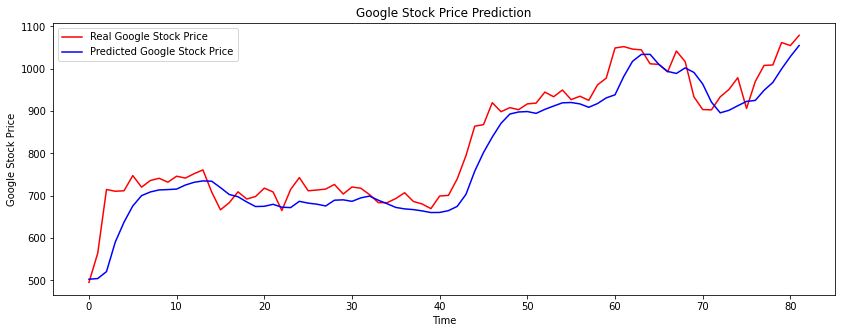

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**conclusion:-**

we got very good prediction, if you fine tine the mode we can get very good results 